Fetching data for SN.L...
Fetched 252 days of data for SN.L 2021
Fetched 250 days of data for SN.L 2022
Fetched 251 days of data for SN.L 2023
Fetched 252 days of data for SN.L 2024
Fetched 157 days of data for SN.L 2025
Fetching data for AZN.L...
Fetched 252 days of data for AZN.L 2021
Fetched 250 days of data for AZN.L 2022
Fetched 251 days of data for AZN.L 2023
Fetched 253 days of data for AZN.L 2024
Fetched 157 days of data for AZN.L 2025
Fetching data for GSK.L...
Fetched 252 days of data for GSK.L 2021
Fetched 250 days of data for GSK.L 2022
Fetched 251 days of data for GSK.L 2023
Fetched 253 days of data for GSK.L 2024
Fetched 157 days of data for GSK.L 2025
Fetching data for HIK.L...
Fetched 252 days of data for HIK.L 2021
Fetched 250 days of data for HIK.L 2022
Fetched 251 days of data for HIK.L 2023
Fetched 253 days of data for HIK.L 2024
Fetched 157 days of data for HIK.L 2025


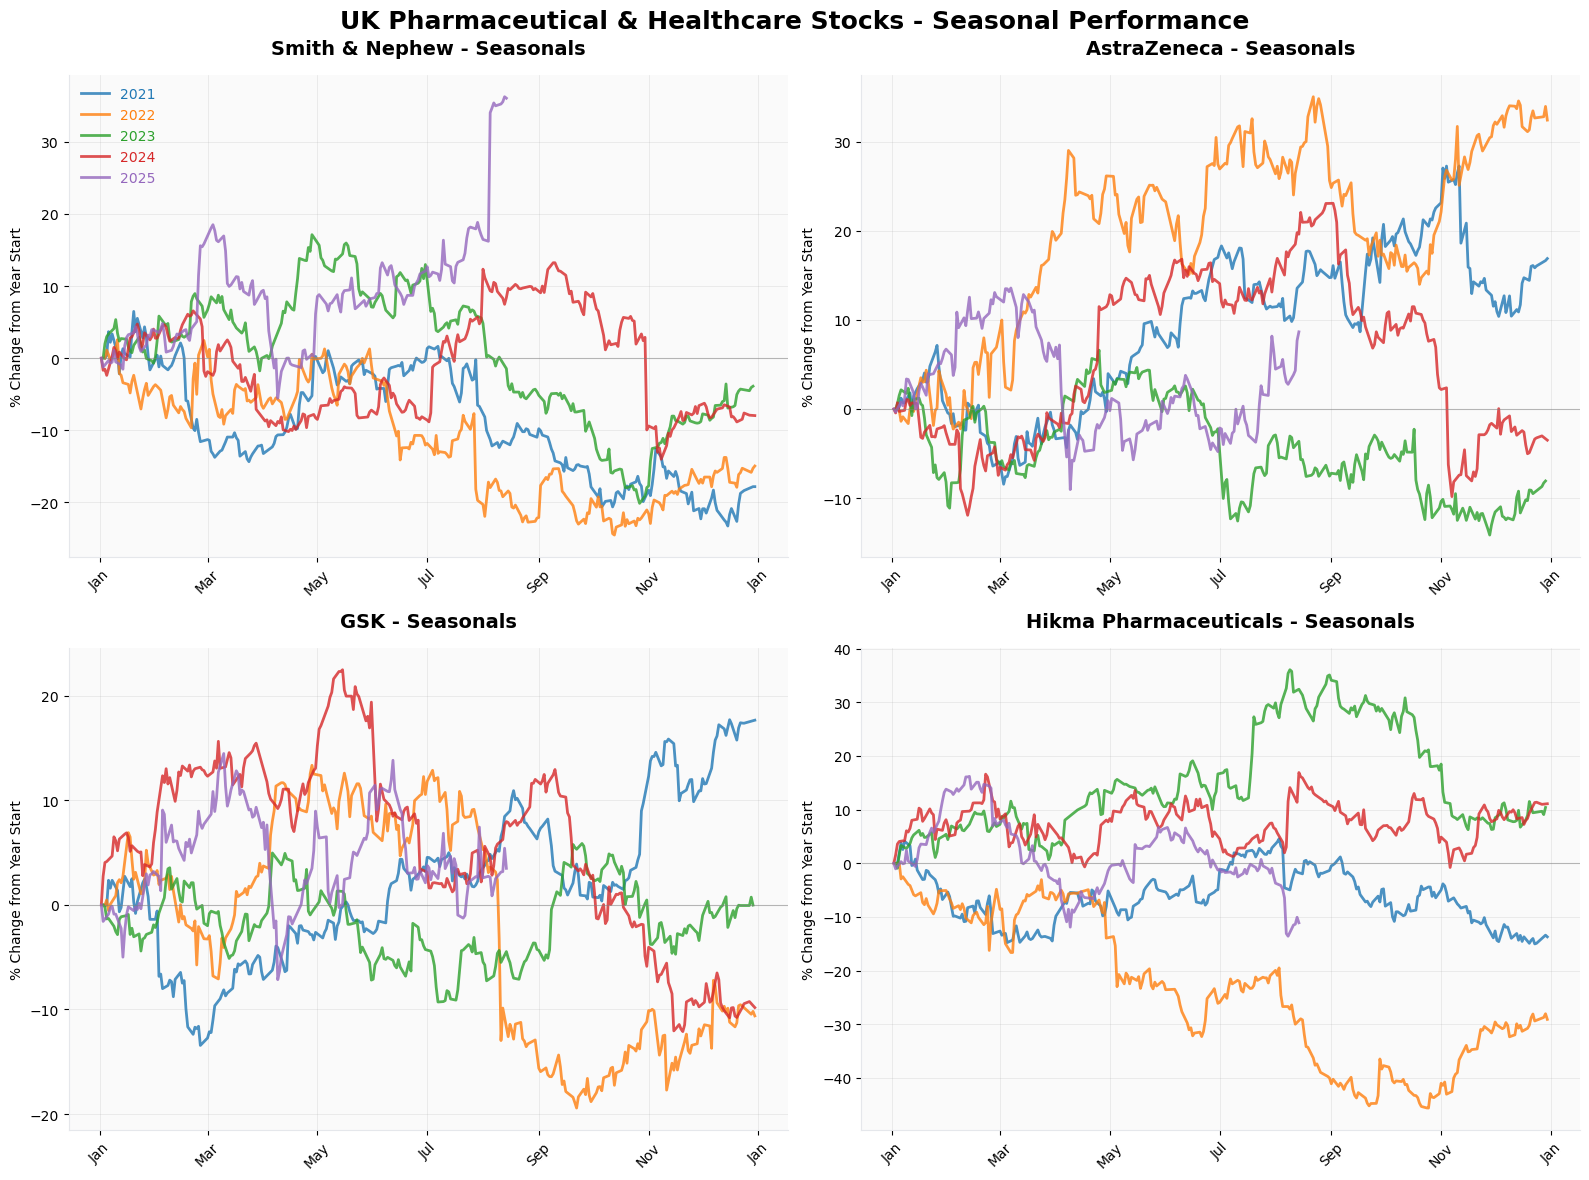

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.dates as mdates

def fetch_stock_data(symbol, years):
    """
    Fetch stock data for multiple years and normalize by year
    """
    all_data = {} 
    
    for year in years:
        try:
            ticker = yf.Ticker(symbol)
            start_date = f"{year}-01-01"
            end_date = f"{year}-12-31"
            hist = ticker.history(start=start_date, end=end_date)
            
            if not hist.empty:
                # Reset index to work with dates
                hist = hist.reset_index()
                # Create day of year for seasonal alignment
                hist['day_of_year'] = hist['Date'].dt.dayofyear
                # Normalize prices to percentage change from year start
                start_price = hist['Close'].iloc[0]
                hist['normalized_close'] = ((hist['Close'] - start_price) / start_price) * 100
                all_data[year] = hist
                print(f"Fetched {len(hist)} days of data for {symbol} {year}")
            else:
                print(f"No data available for {symbol} {year}")
                
        except Exception as e:
            print(f"Error fetching data for {symbol} {year}: {e}")
    
    return all_data

def create_seasonal_charts_grid(symbols, years=None, titles=None):
    """
    Create a 2x2 grid of seasonal charts for multiple stock symbols
    """
    if years is None:
        years = [2021, 2022, 2023, 2024, 2025]
    
    if titles is None:
        titles = [f"{symbol.upper()}" for symbol in symbols]
    
    # Create 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('UK Pharmaceutical & Healthcare Stocks - Seasonal Performance', 
                 fontsize=18, fontweight='bold', y=0.98)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten()
    
    for idx, symbol in enumerate(symbols):
        ax = axes_flat[idx]
        print(f"Fetching data for {symbol}...")
        stock_data = fetch_stock_data(symbol, years)
        
        if not stock_data:
            print(f"No data available for {symbol}")
            continue
        
        # Plot data for each year
        for i, year in enumerate(years):
            if year in stock_data:
                data = stock_data[year]
                
                # Create month-day format for x-axis alignment
                dates = pd.to_datetime("2024-" + data['Date'].dt.month.astype(str).str.zfill(2) + 
                                     "-" + data['Date'].dt.day.astype(str).str.zfill(2))
                
                ax.plot(dates, data['normalized_close'], 
                       color=colors[i % len(colors)], 
                       linewidth=2, 
                       label=str(year), 
                       alpha=0.8)
        
        # Customize each subplot
        ax.set_title(f'{titles[idx]} - Seasonals', fontsize=14, fontweight='bold', pad=15)
        ax.set_ylabel('% Change from Year Start', fontsize=10)
        
        # Format x-axis to show months
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        
        # Add horizontal line at 0%
        ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5, linewidth=0.8)
        
        # Add grid
        ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
        ax.set_axisbelow(True)
        
        # Style the axes
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#E5E7EB')
        ax.spines['bottom'].set_color('#E5E7EB')
        
        # Add legend only to the first subplot to avoid clutter
        if idx == 0:
            legend = ax.legend(loc='upper left', frameon=False, fontsize=10)
            for i, text in enumerate(legend.get_texts()):
                text.set_color(colors[i % len(colors)])
        ax.set_facecolor('#FAFAFA')
        
        # Rotate x-axis labels 
        ax.tick_params(axis='x', rotation=45)
    fig.patch.set_facecolor('white')
    plt.tight_layout()
    plt.show()
    return fig

if __name__ == "__main__":
    # UK Pharmaceutical stocks
    UK_PHARMA_SYMBOLS = ["SN.L", "AZN.L", "GSK.L", "HIK.L"]
    UK_PHARMA_TITLES = ["Smith & Nephew", "AstraZeneca", "GSK", "Hikma Pharmaceuticals"]
    YEARS = [2021, 2022, 2023, 2024, 2025]
    
    # Create the 2x2 grid of seasonal charts
    fig = create_seasonal_charts_grid(UK_PHARMA_SYMBOLS, YEARS, UK_PHARMA_TITLES)

Fetching data for LLOY.L...
Fetched 251 days of data for LLOY.L 2023
Fetched 253 days of data for LLOY.L 2024
Fetched 157 days of data for LLOY.L 2025
Fetching data for NWG.L...
Fetched 251 days of data for NWG.L 2023
Fetched 253 days of data for NWG.L 2024
Fetched 157 days of data for NWG.L 2025
Fetching data for HSBA.L...
Fetched 251 days of data for HSBA.L 2023
Fetched 253 days of data for HSBA.L 2024
Fetched 157 days of data for HSBA.L 2025
Fetching data for BARC.L...
Fetched 251 days of data for BARC.L 2023
Fetched 253 days of data for BARC.L 2024
Fetched 157 days of data for BARC.L 2025


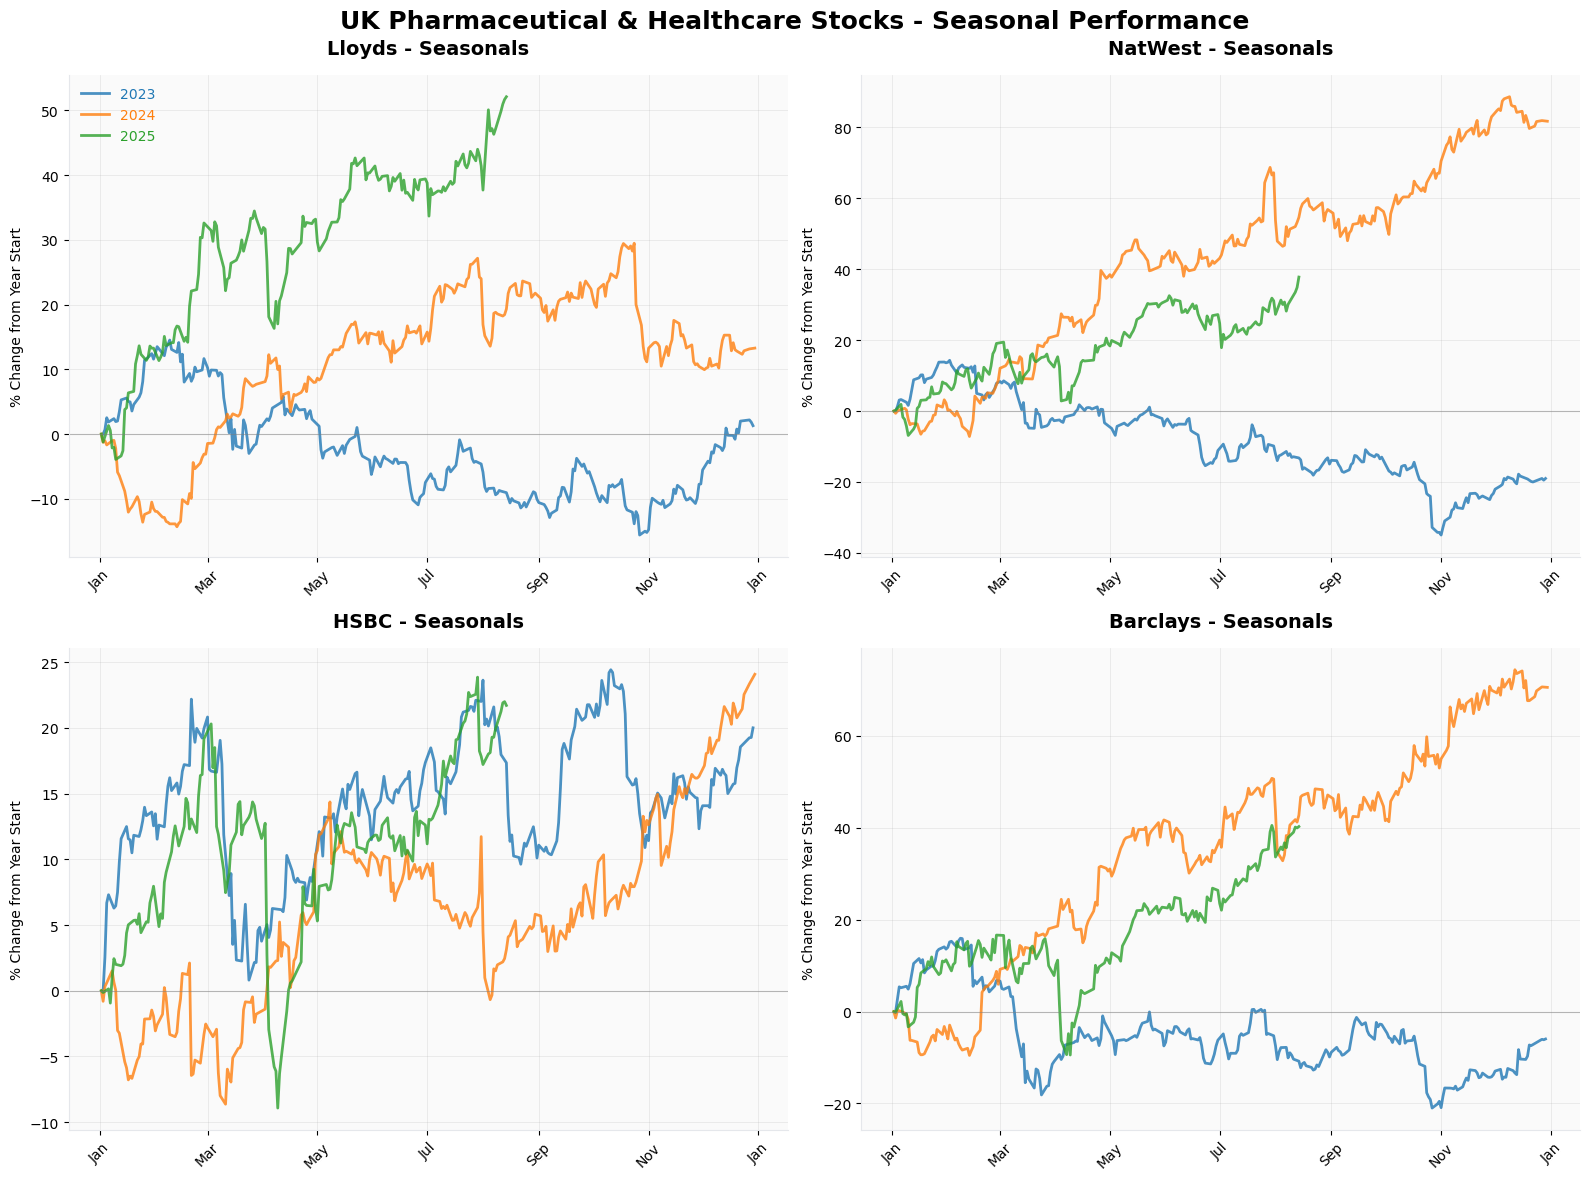

In [ ]:
# UK Banking stocks
UK_FIN_SYMBOLS = ["LLOY.L", "NWG.L", "HSBA.L", "BARC.L"]
UK_FIN_TITLES = ["Lloyds", "NatWest", "HSBC", "Barclays"]
YEARS = [2023, 2024, 2025]
    
# Create the 2x2 grid of seasonal charts
fig = create_seasonal_charts_grid(UK_FIN_SYMBOLS, YEARS, UK_FIN_TITLES)

/var/folders/07/4t2tqd893f5d71zmw817djg80000gn/T/ipykernel_4293/4115389075.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = hist['Close'].resample('M').last().pct_change() * 100


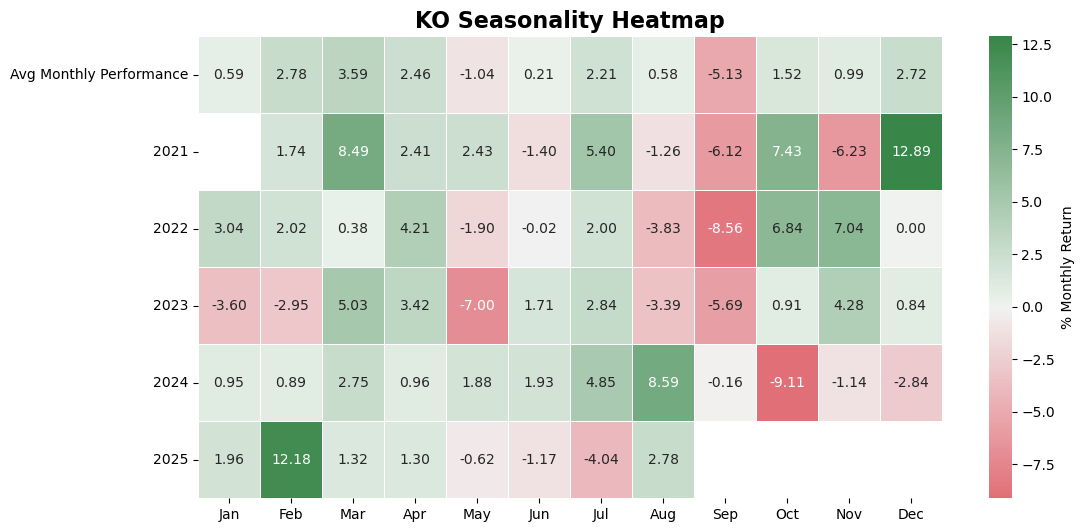

In [6]:
import seaborn as sns

def fetch_monthly_returns(symbol, years):
    """
    Fetch monthly percentage returns for the given years.
    Returns a DataFrame with years as rows and months as columns.
    """
    ticker = yf.Ticker(symbol)
    start_date = f"{min(years)}-01-01"
    end_date = f"{max(years)}-12-31"
    hist = ticker.history(start=start_date, end=end_date)
    
    if hist.empty:
        print(f"No data found for {symbol}")
        return None
    
    hist['Year'] = hist.index.year
    hist['Month'] = hist.index.month
    
    monthly_returns = hist['Close'].resample('M').last().pct_change() * 100
    monthly_returns_df = monthly_returns.to_frame(name='Return')
    monthly_returns_df['Year'] = monthly_returns_df.index.year
    monthly_returns_df['Month'] = monthly_returns_df.index.month
    
    pivot = monthly_returns_df.pivot(index='Year', columns='Month', values='Return')
    pivot = pivot.reindex(index=years)
    
    # Rename months
    month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    pivot.columns = month_names[:len(pivot.columns)]
    
    return pivot

def plot_seasonality_matrix(symbol, years):
    """
    Plots a heatmap-style matrix of monthly returns per year.
    """
    data = fetch_monthly_returns(symbol, years)
    if data is None:
        return
    
    avg_row = pd.DataFrame(data.mean(axis=0)).T
    avg_row.index = ['Avg Monthly Performance']
    matrix = pd.concat([avg_row, data])
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        matrix,
        annot=True,
        fmt=".2f",
        cmap=sns.diverging_palette(10, 133, as_cmap=True),  # Green to Red
        center=0,
        linewidths=0.5,
        cbar_kws={'label': '% Monthly Return'}
    )
    plt.title(f'{symbol} Seasonality Heatmap', fontsize=16, fontweight='bold')
    plt.yticks(rotation=0)
    plt.show()

# Example usage
YEARS = [2021, 2022, 2023, 2024, 2025]
plot_seasonality_matrix("KO", YEARS)